Problem 3 : Implements a supervised selection of both weights and centers using a two block decomposition method which alternates the minimization with respect to weights and centers.

In [2]:
%matplotlib inline
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.metrics import mean_squared_error
from __future__ import division
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import time
import numdifftools
import numdifftools.nd_algopy as nda

In [3]:
x1 = np.array([0.9958353402931972, 0.42873694033293397, 0.19217723679077281, 0.71488612997180501, 0.46383126295458199, 0.66974426930329678, 0.066263559118869719, 0.9480058493985315, 0.8293286102121662, 0.18373413163159513, 0.53388220408344977, 0.50324073738249198, 0.76293008039041421, 0.47594723537549088, 0.31172453928619837, 0.61924547015284037, 0.10050134386745091, 0.22260868754229723, 0.35001463623734963, 0.14627717939709295, 0.12496220086685006, 0.77930601347322903, 0.2103113176292718, 0.24387419293013968, 0.23980391985165261, 0.044104757632617675, 0.24483640371542925, 0.96208003929206942, 0.11654413690220777, 0.63143705587409138, 0.060624912194398695, 0.88528551201238537, 0.66895473507556358, 0.42009504181562651, 0.87836160667763197, 0.98322978377675474, 0.6504574724668154, 0.11173592920727737, 0.80141779681303438, 0.13852022417094023, 0.70831228979926153, 0.46300211406841951, 0.44286814519774853, 0.17816460503737608, 0.70472978047986978, 0.57365570952802869, 0.20460602506944792, 0.73378735785721394, 0.95952905903893937, 0.91444372653530392, 0.13372498902170327, 0.94690255416025471, 0.24680129260237649, 0.30989562230781176, 0.65520402087345087, 0.56734498327988336, 0.48986591808406166, 0.85857360617446621, 0.84417203687668374, 0.79265792667341706, 0.84666666473554852, 0.82166351845466745, 0.64784553968701897, 0.91999327127869979, 0.12343924287994767, 0.13062537386951478, 0.98070842831461258, 0.71972856479671987, 0.20037551706588619, 0.027716634803678142, 0.85100602533015657, 0.42124744217495913, 0.21816056776889992, 0.57183349251745408, 0.22996555257457729, 0.069783068851780095, 0.5196544851659386, 0.05847822492603294, 0.56595413408932282, 0.10374195592804847, 0.90363009104415926, 0.78348967124635716, 0.52877806758043822, 0.52815167044008426, 0.97559835113345006, 0.67329543789784951, 0.68521577188286609, 0.46924807604035157, 0.17886471170296414, 0.68547369826537852, 0.91820133362930689, 0.48044285978367574, 0.32368080175862668, 0.56738241760500896, 0.7507906579182293, 0.37467746496173637, 0.85630638169587481, 0.82542188504330716, 0.87175400731606334, 0.10693823146415216])

x2 = np.array([0.94397468321531419, 0.84936195002221571, 0.88835416982021786, 0.3351395850229697, 0.97549891609392081, 0.72119695695406094, 0.4939274745463702, 0.77125797617766345, 0.28647300867990189, 0.16863131914855933, 0.49356323038788341, 0.9303842603683905, 0.66803239253919533, 0.65631681110241225, 0.76688456488126211, 0.44684204168158359, 0.78656157786170477, 0.04884277732237885, 0.90946336297546815, 0.16870364522268033, 0.4720782381382822, 0.30536511395253729, 0.42516254747015925, 0.81855813831250035, 0.32866687571563968, 0.064099594073537824, 0.33481634349639156, 0.26967295168356153, 0.32820910408217296, 0.58576377020266801, 0.1732881845977976, 0.61709324581996383, 0.67242628272498461, 0.071976121467904997, 0.30102022547879903, 0.51716404052821929, 0.97968630044852001, 0.67401484176625925, 0.83357660482705476, 0.75123726979469962, 0.18787607762786196, 0.063587956209455565, 0.86199956692065982, 0.0544364524835379, 0.55055201109482943, 0.10263869125293923, 0.83044082378354178, 0.5566460107745711, 0.91251242194400695, 0.16197873782878291, 0.95600518562202197, 0.62717970782907151, 0.39986311307204647, 0.19935892005408506, 0.41744615013056829, 0.81678280998769526, 0.36284615303415446, 0.81155369775834274, 0.72870443999329448, 0.109463804579506, 0.30805212479644006, 0.67124727770600623, 0.92832210910667134, 0.35536125513849426, 0.71085021923839398, 0.1539291640605962, 0.6658898407105236, 0.093397181572599686, 0.11757672792613028, 0.27271543809736731, 0.43347682924975794, 0.94549694393758299, 0.38408573931817336, 0.92164887761276204, 0.37528335331555407, 0.15541746455218863, 0.48392025094558666, 0.077618332074833707, 0.50416754104733674, 0.57862714213252087, 0.55254167878812666, 0.84209257581325403, 0.7283382242577694, 0.39160364535425896, 0.84335603513230295, 0.15035656054203139, 0.76654119847186086, 0.0054528180068394994, 0.64959296700971481, 0.9642020683179986, 0.48356057865888424, 0.054068379178072723, 0.75134942803903526, 0.71549493422473187, 0.20450237412747108, 0.36499776692323715, 0.097649052291734151, 0.38663006018783153, 0.30005284930101594, 0.73733987963229708])

y = np.array([0.45093252453337712, 0.58457775874172069, 0.63026554608636864, 1.5052172914161432, 0.59064993591310799, 0.93993252946804384, 1.0129594277143021, 0.74134122205295139, 0.95050119337720695, 1.6388227464507175, 0.95326708773797786, 0.89660815149361106, 0.82887816712389106, 0.94985536703995044, 0.6130267786382253, 0.63150252017494357, 1.1252842539145314, 1.7191076020462788, 0.39614859180529138, 1.2060058055026854, 1.5413824050622584, 0.86083427792378309, 0.90912755527705191, 0.89349387064884689, 1.4229570771519109, 0.98192299554047291, 1.7834377811068904, 0.32141013283495246, 1.9262422748397339, 0.39202672577725967, 1.6961788288109891, 0.86717249998048018, 0.65950822173362245, 0.98676911114030841, 0.65438172141159145, 0.23014744635965495, 0.74340325452276612, 0.92120144611463439, 1.0683218134300163, 0.36382030177645697, 1.3850889564313045, 1.2731834061509817, 0.19397778903653132, 1.004307155601204, 0.75030492422403161, 0.72411469794429273, 0.68424535648401252, 0.5576474122472892, 0.24619007937777626, 1.2404455964218704, 0.51050977413844745, 0.77616727845494027, 0.8710339178097054, 1.5453703019630116, 0.76061981617531882, 0.29050553923937639, 0.53218719596907449, 0.23540720573346213, 1.0369340713126924, 0.93699234061470804, 1.3156524001928374, 0.71428668766986636, 0.76514917619693568, 0.81131133889619722, 0.75784220699370797, 1.5548398499669052, 0.43802687884687008, 0.38580225319744876, 1.1779090120240032, 1.6154832357368245, 0.83870534744007919, 0.6136578568732548, 1.2970612968008293, 0.48569349056618039, 1.8083996267888156, 1.6465286760659117, 1.0668002986775242, 1.5222175682801991, 1.0874307471706597, 1.2436719265473197, 1.1153325666070963, 1.028895686291794, 0.9896633037772522, 0.61531814736196944, 0.51028808330862341, 1.3063665977640542, 0.25866633265684391, 0.74839660516947837, 0.38070761120901331, 0.66192441344541342, 0.7984356133918098, 1.3887457824215181, 0.71021685843743221, 0.43949070039539873, 1.3948088517109727, 0.77491318624600602, 0.8936931991021374, 1.0455502081615169, 1.2115791896556263, 1.0031890864054331])

x1_train = x1[0:80]
x2_train = x2[0:80]
y_train = y[0:80]

x1_test = x1[80:100]
x2_test = x2[80:100]
y_test = y[80:100]

In [7]:
def plot_(estimated_y):
    X1 = np.arange(0, 1, 0.01)
    X2 = np.arange(0, 1, 0.01)
    X1,X2 = np.meshgrid(X1,X2)   
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X1,X2,estimated_y , rstride=1, cstride=1,cmap=cm.coolwarm,linewidth=0.01)
    plt.show()    
    return '.'


Below i write the code decomposition algorithm with the two step :

1) minimization respect to the weights
2) minimization respect to the centers
\vspace{5mm}
for every steps we evaluate the norm of the Jacobian (LA.norm(opt_w.jac)) and the value of the objective function (opt_w.fun): 

In [56]:
def decomp_alg1(function_w,function_c,theta,e1,e2,c,f_w,f_c,N):
    start = timer()
    df = 60
    g = []
    while df != 0.0e-09:
        x0 = np.zeros(N)
        opt_w = minimize(function_w ,x0,args=(x1_train,x2_train,y_train,c))
        if opt_w.fun <= f_w and LA.norm(opt_w.jac) <= e1 :
            f_w = opt_w.fun
            w = opt_w.x
            e1 = theta*e1
            g.append(LA.norm(opt_w.jac))
            x0 = np.zeros(len(c))
            opt_c = minimize(function_c ,x0,args=(x1_train,x2_train,y_train,w))
            if opt_c.fun <= f_c and LA.norm(opt_c.jac) <= e2:
                f_c = opt_c.fun
                c = opt_c.x
                e2 = theta*e2
                g.append(LA.norm(opt_c.jac))
                df = np.sum(g)
            else:
                end = timer()
                return c,w,(end - start)
            
        else:
            end = timer()
            return c,w,(end - start)
            
        
function_1 = lambda w,x1_train,x2_train,y_train,c: 0.5*(np.sum(((w[0]*(np.exp(-1*(np.sqrt((x1_train-c[0])**2 
                        + (x2_train-c[1])**2))**2))) - y_train)**2)) + 0.005*(c[0]**2 + c[1]**2) + 0.005*w[0]**2        

function_2 = lambda c,x1_train,x2_train,y_train,w: 0.5*(np.sum((w*(np.exp(-1*(np.sqrt((x1_train-c[0])**2 
                              + (x2_train-c[1])**2))**2))) - y_train)**2) + 0.005*(c[1]**2  + c[0]**2)+ 0.005*w**2
c = np.array([0,0])
N = 1
print(decomp_alg1(function_1,function_2,0.4,10,20,c,300,300,N))

(array([ 0.09962191,  0.10466989]), array([ 1.4271269]), 0.37673091888427734)


\vspace{5mm}
How in the prevoius problems we compute the optimization routine for N = 1,2,4 and µ = 0.01,2,20 .
N = 1   µ = 0.01


In [31]:
w = 1.42712608
center = np.array([0.09962725,0.10466565])
estimated_y_N1 = lambda w,center,x1,x2: (w*(np.exp(-1*(np.sqrt((x1-center[0])**2 + (x2-center[1])**2))**2)))

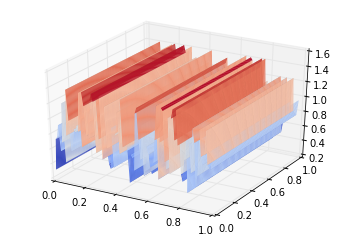

.


In [32]:
print(plot_(estimated_y_N1(w,center,x1,x2)))

In [19]:
print 'the training error is '+str(mean_squared_error(y_train,estimated_y(w,center,x1_train,x2_train)))
print 'the test error is '+str(mean_squared_error(y_test,estimated_y(w,center,x1_test,x2_test)))

the training error is 0.0892731659345
the test error is 0.133908337073


\vspace{5mm}
N = 1  µ = 2

In [24]:
function_3 = lambda w,x1_train,x2_train,y_train,c: 0.5*(np.sum(((w[0]*(np.exp(-1*(np.sqrt((x1_train-c[0])**2 
                        + (x2_train-c[1])**2))**2))) - y_train)**2)) + (c[0]**2 + c[1]**2) + 2*w[0]**2        

function_4 = lambda c,x1_train,x2_train,y_train,w: 0.5*(np.sum((w*(np.exp(-1*(np.sqrt((x1_train-c[0])**2 
                              + (x2_train-c[1])**2))**2))) - y_train)**2) + (c[1]**2  + c[0]**2)+ 2*w**2
c = np.array([0,0])
print(decomp_alg1(function_3,function_4,0.4,10,20,c,300,300))

(array([ 0.27963513,  0.29138371]), array([ 1.18864671]), 0.08893704414367676)


In [25]:
w = 1.18864671
center = np.array([0.27963513,0.29138371])

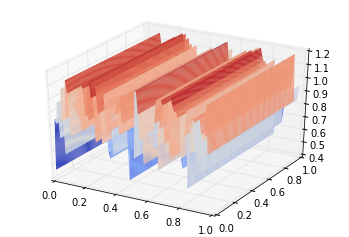

.


In [26]:
print(plot_(estimated_y_N1(w,center,x1,x2)))

In [27]:
print 'the training error is '+str(mean_squared_error(y_train,estimated_y(w,center,x1_train,x2_train)))
print 'the test error is '+str(mean_squared_error(y_test,estimated_y(w,center,x1_test,x2_test)))

the training error is 0.112677959879
the test error is 0.116937602136


\vspace{5mm}
N = 1  µ = 20

In [40]:
function_5 = lambda w,x1_train,x2_train,y_train,c: 0.5*(np.sum(((w[0]*(np.exp(-1*(np.sqrt((x1_train-c[0])**2 
                        + (x2_train-c[1])**2))**2))) - y_train)**2)) + 10*(c[0]**2 + c[1]**2) + 10*w[0]**2        

function_6 = lambda c,x1_train,x2_train,y_train,w: 0.5*(np.sum((w*(np.exp(-1*(np.sqrt((x1_train-c[0])**2 
                              + (x2_train-c[1])**2))**2))) - y_train)**2) + 10*(c[1]**2  + c[0]**2)+ 10*w**2
c = np.array([0,0])
print(decomp_alg1(function_5,function_6,0.4,10,20,c,300,300))

(array([ 0.4860647 ,  0.50152257]), array([ 0.95572679]), 0.013345956802368164)


In [37]:
w = 0.95572679
center = np.array([0.4860647,0.50152257])

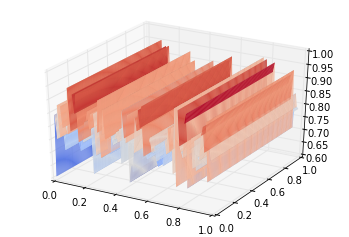

.


In [38]:
print(plot_(estimated_y_N1(w,center,x1,x2)))

In [39]:
print 'the training error is '+str(mean_squared_error(y_train,estimated_y(w,center,x1_train,x2_train)))
print 'the test error is '+str(mean_squared_error(y_test,estimated_y(w,center,x1_test,x2_test)))

the training error is 0.20208586414
the test error is 0.119972918738


\vspace{5mm}
N = 2  µ = 0.01

In [58]:
function_7 = lambda w,x1_train,x2_train,y_train,c: 0.5*(np.sum((((w[0]*(np.exp(-1*(np.sqrt((x1_train-c[0])**2 
+ (x2_train-c[1])**2))**2))) + (w[1]*(np.exp(-1*(np.sqrt((x1_train-c[2])**2 + (x2_train-c[3])**2))**2))))- y_train)**2)) \
+ (0.005)*(c[0]**2 + c[1]**2 + c[2]**2 + c[3]**2 + w[0]**2 + w[1]**2)

function_8 = lambda c,x1_train,x2_train,y_train,w: 0.5*(np.sum((((w[0]*(np.exp(-1*(np.sqrt((x1_train-c[0])**2
+ (x2_train-c[1])**2))**2))) + (w[1]*(np.exp(-1*(np.sqrt((x1_train-c[2])**2 + (x2_train-c[3])**2))**2))))- y_train)**2)) \
+ (0.005)*(c[0]**2 + c[1]**2 + c[2]**2 + c[3]**2 + w[0]**2 + w[1]**2)

c = np.array([0,0,0,0])
N = 2
print(decomp_alg1(function_7,function_8,0.4,10,20,c,300,300,N))

(array([ 0.130351  ,  0.06266417,  0.130351  ,  0.06266417]), array([ 0.71750914,  0.71750914]), 0.1534428596496582)


In [68]:
w = np.array([0.71750914,0.71750914])
c = np.array([0.130351,0.06266417,0.130351,0.06266417])

estimated_y_N2 = lambda w,c,x1,x2: (w[0]*(np.exp(-1*(np.sqrt((x1-c[0])**2
                        + (x2-c[1])**2))**2))) + (w[1]*(np.exp(-1*(np.sqrt((x1-c[2])**2 + (x2-c[3])**2))**2)))

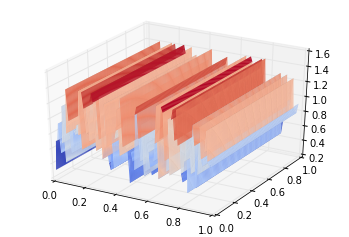

.


In [69]:
print(plot_(estimated_y_N2(w,c,x1,x2)))

In [72]:
print 'the training error is '+str(mean_squared_error(y_train,estimated_y_N2(w,c,x1_train,x2_train)))
print 'the test error is '+str(mean_squared_error(y_test,estimated_y_N2(w,c,x1_test,x2_test)))

the training error is 0.0886649504612
the test error is 0.12806203904


\vspace{5mm}
N = 2  µ = 2

In [73]:
function_9 = lambda w,x1_train,x2_train,y_train,c: 0.5*(np.sum((((w[0]*(np.exp(-1*(np.sqrt((x1_train-c[0])**2 
+ (x2_train-c[1])**2))**2))) + (w[1]*(np.exp(-1*(np.sqrt((x1_train-c[2])**2 + (x2_train-c[3])**2))**2))))- y_train)**2)) \
+ (c[0]**2 + c[1]**2 + c[2]**2 + c[3]**2 + w[0]**2 + w[1]**2)

function_10 = lambda c,x1_train,x2_train,y_train,w: 0.5*(np.sum((((w[0]*(np.exp(-1*(np.sqrt((x1_train-c[0])**2
+ (x2_train-c[1])**2))**2))) + (w[1]*(np.exp(-1*(np.sqrt((x1_train-c[2])**2 + (x2_train-c[3])**2))**2))))- y_train)**2)) \
+ (c[0]**2 + c[1]**2 + c[2]**2 + c[3]**2 + w[0]**2 + w[1]**2)

c = np.array([0,0,0,0])
N = 2
print(decomp_alg1(function_9,function_10,0.4,10,20,c,300,300,N))

(array([ 0.13798212,  0.09381295,  0.13798212,  0.09381295]), array([ 0.68457995,  0.68457995]), 0.17414283752441406)


In [74]:
w = np.array([0.68457995,0.68457995])
c = np.array([0.13798212,0.09381295,0.13798212,0.09381295])

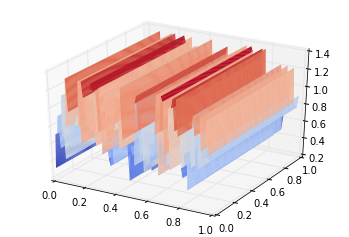

.


In [75]:
print(plot_(estimated_y_N2(w,c,x1,x2)))

In [76]:
print 'the training error is '+str(mean_squared_error(y_train,estimated_y_N2(w,c,x1_train,x2_train)))
print 'the test error is '+str(mean_squared_error(y_test,estimated_y_N2(w,c,x1_test,x2_test)))

the training error is 0.0895637359748
the test error is 0.126193265107


\vspace{5mm}
N = 2  µ = 20

In [82]:
function_11 = lambda w,x1_train,x2_train,y_train,c: 0.5*(np.sum((((w[0]*(np.exp(-1*(np.sqrt((x1_train-c[0])**2 
+ (x2_train-c[1])**2))**2))) + (w[1]*(np.exp(-1*(np.sqrt((x1_train-c[2])**2 + (x2_train-c[3])**2))**2))))- y_train)**2)) \
+ 10*(c[0]**2 + c[1]**2 + c[2]**2 + c[3]**2 + w[0]**2 + w[1]**2)

function_12 = lambda c,x1_train,x2_train,y_train,w: 0.5*(np.sum((((w[0]*(np.exp(-1*(np.sqrt((x1_train-c[0])**2
+ (x2_train-c[1])**2))**2))) + (w[1]*(np.exp(-1*(np.sqrt((x1_train-c[2])**2 + (x2_train-c[3])**2))**2))))- y_train)**2)) \
+ 10*(c[0]**2 + c[1]**2 + c[2]**2 + c[3]**2 + w[0]**2 + w[1]**2)

c = np.array([0,0,0,0])
N = 2
print(decomp_alg1(function_11,function_12,0.4,10,20,c,300,300,N))

(array([ 0.13248794,  0.12736648,  0.13248794,  0.12736649]), array([ 0.55289695,  0.55289707]), 0.10376715660095215)


In [83]:
w = np.array([0.55289695,0.55289707])
c = np.array([0.13248794,0.12736648,0.13248794,0.12736649])

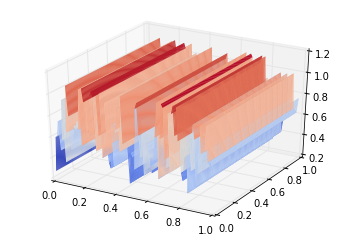

.


In [84]:
print(plot_(estimated_y_N2(w,c,x1,x2)))

In [85]:
print 'the training error is '+str(mean_squared_error(y_train,estimated_y_N2(w,c,x1_train,x2_train)))
print 'the test error is '+str(mean_squared_error(y_test,estimated_y_N2(w,c,x1_test,x2_test)))

the training error is 0.12802314748
the test error is 0.147681139026


\vspace{5mm}
N = 4   µ = 0.01

In [87]:
function_11 = lambda w,x1_train,x2_train,y_train,c: 0.5*(np.sum(((((w[0]*(np.exp(-1*(np.sqrt((x1_train-c[0])**2 
+ (x2_train-c[1])**2))**2))) + (w[1]*(np.exp(-1*(np.sqrt((x1_train-c[2])**2 + (x2_train-c[3])**2))**2))) + 
w[2]*(np.exp(-1*(np.sqrt((x1_train-c[4])**2 + (x2_train-c[5])**2))**2))) +
(w[3]*(np.exp(-1*(np.sqrt((x1_train-c[6])**2 + (x2_train-c[7])**2))**2))))- y_train)**2)) \
+ 0.05*(c[0]**2 + c[1]**2 + c[2]**2 + c[3]**2+c[4]**2 + c[5]**2 + c[6]**2 + c[7]**2 + w[0]**2 + w[1]**2 + w[2]**2 + w[3]**2)

function_12 = lambda c,x1_train,x2_train,y_train,w: 0.5*(np.sum(((((w[0]*(np.exp(-1*(np.sqrt((x1_train-c[0])**2 
+ (x2_train-c[1])**2))**2))) + (w[1]*(np.exp(-1*(np.sqrt((x1_train-c[2])**2 + (x2_train-c[3])**2))**2))) + 
w[2]*(np.exp(-1*(np.sqrt((x1_train-c[4])**2 + (x2_train-c[5])**2))**2))) +
(w[3]*(np.exp(-1*(np.sqrt((x1_train-c[6])**2 + (x2_train-c[7])**2))**2))))- y_train)**2)) \
+ 0.05*(c[0]**2 + c[1]**2 + c[2]**2 + c[3]**2+c[4]**2 + c[5]**2 + c[6]**2 + c[7]**2 + w[0]**2 + w[1]**2 + w[2]**2 + w[3]**2)

c = np.array([0,0,0,0,0,0,0,0])
N = 4
print(decomp_alg1(function_11,function_12,0.4,10,20,c,300,300,N))

(array([ 0.72078232,  0.25749138, -0.17387136, -0.0091674 , -0.17380469,
       -0.00916741, -0.17272374, -0.00913182]), array([ 0.41849315,  0.42956076,  0.42945125,  0.42763284]), 1.5850260257720947)


In [100]:
w = np.array([0.41849315,0.42956076,0.42945125,0.42763284])
c = np.array([0.72078232,0.25749138,-0.17387136,-0.0091674,-0.17380469,-0.00916741,-0.17272374,-0.00913182])
estimated_y_N8 = lambda w,c,x1,x2 :((((w[0]*(np.exp(-1*(np.sqrt((x1-c[0])**2 
            + (x2-c[1])**2))**2))) + (w[1]*(np.exp(-1*(np.sqrt((x1-c[2])**2 + (x2-c[3])**2))**2))) + w[2]*(np.exp(-1*(np.sqrt((x1-c[4])**2 + (x2-c[5])**2))**2))) +(w[3]*(np.exp(-1*(np.sqrt((x1-c[6])**2 + (x2-c[7])**2))**2)))))

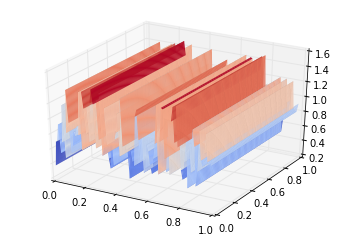

.


In [101]:
print(plot_(estimated_y_N8(w,c,x1,x2)))

In [102]:
print 'the training error is '+str(mean_squared_error(y_train,estimated_y_N8(w,c,x1_train,x2_train)))
print 'the test error is '+str(mean_squared_error(y_test,estimated_y_N8(w,c,x1_test,x2_test)))

the training error is 0.0855102007775
the test error is 0.117762390667


\vspace{5mm}
N = 4  µ = 2

In [103]:
function_13 = lambda w,x1_train,x2_train,y_train,c: 0.5*(np.sum(((((w[0]*(np.exp(-1*(np.sqrt((x1_train-c[0])**2 
+ (x2_train-c[1])**2))**2))) + (w[1]*(np.exp(-1*(np.sqrt((x1_train-c[2])**2 + (x2_train-c[3])**2))**2))) + 
w[2]*(np.exp(-1*(np.sqrt((x1_train-c[4])**2 + (x2_train-c[5])**2))**2))) +
(w[3]*(np.exp(-1*(np.sqrt((x1_train-c[6])**2 + (x2_train-c[7])**2))**2))))- y_train)**2)) \
+ (c[0]**2 + c[1]**2 + c[2]**2 + c[3]**2+c[4]**2 + c[5]**2 + c[6]**2 + c[7]**2 + w[0]**2 + w[1]**2 + w[2]**2 + w[3]**2)

function_14 = lambda c,x1_train,x2_train,y_train,w: 0.5*(np.sum(((((w[0]*(np.exp(-1*(np.sqrt((x1_train-c[0])**2 
+ (x2_train-c[1])**2))**2))) + (w[1]*(np.exp(-1*(np.sqrt((x1_train-c[2])**2 + (x2_train-c[3])**2))**2))) + 
w[2]*(np.exp(-1*(np.sqrt((x1_train-c[4])**2 + (x2_train-c[5])**2))**2))) +
(w[3]*(np.exp(-1*(np.sqrt((x1_train-c[6])**2 + (x2_train-c[7])**2))**2))))- y_train)**2)) \
+ (c[0]**2 + c[1]**2 + c[2]**2 + c[3]**2+c[4]**2 + c[5]**2 + c[6]**2 + c[7]**2 + w[0]**2 + w[1]**2 + w[2]**2 + w[3]**2)

print(decomp_alg1(function_11,function_12,0.4,10,20,c,300,300,N))

(array([ 0.85622917,  0.30303382, -0.20397739, -0.0175151 , -0.20397681,
       -0.01751511, -0.20397694, -0.01751511]), array([ 0.41017162,  0.46133569,  0.46133542,  0.46133548]), 1.1140310764312744)


In [104]:
w = np.array([0.41017162,0.46133569, 0.46133542,0.46133548])
c = np.array([0.85622917,0.30303382,-0.20397739,-0.0175151,-0.20397681,-0.01751511,-0.20397694,-0.01751511])


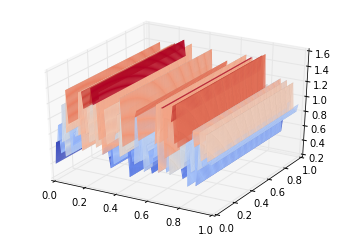

.


In [105]:
print(plot_(estimated_y_N8(w,c,x1,x2)))

In [106]:
print 'the training error is '+str(mean_squared_error(y_train,estimated_y_N8(w,c,x1_train,x2_train)))
print 'the test error is '+str(mean_squared_error(y_test,estimated_y_N8(w,c,x1_test,x2_test)))

the training error is 0.0847469775409
the test error is 0.114745553554


\vspace{5mm}
N = 4  µ = 20

In [107]:
function_15 = lambda w,x1_train,x2_train,y_train,c: 0.5*(np.sum(((((w[0]*(np.exp(-1*(np.sqrt((x1_train-c[0])**2 
+ (x2_train-c[1])**2))**2))) + (w[1]*(np.exp(-1*(np.sqrt((x1_train-c[2])**2 + (x2_train-c[3])**2))**2))) + 
w[2]*(np.exp(-1*(np.sqrt((x1_train-c[4])**2 + (x2_train-c[5])**2))**2))) +
(w[3]*(np.exp(-1*(np.sqrt((x1_train-c[6])**2 + (x2_train-c[7])**2))**2))))- y_train)**2)) \
+ 10*(c[0]**2 + c[1]**2 + c[2]**2 + c[3]**2+c[4]**2 + c[5]**2 + c[6]**2 + c[7]**2 + w[0]**2 + w[1]**2 + w[2]**2 + w[3]**2)

function_16 = lambda c,x1_train,x2_train,y_train,w: 0.5*(np.sum(((((w[0]*(np.exp(-1*(np.sqrt((x1_train-c[0])**2 
+ (x2_train-c[1])**2))**2))) + (w[1]*(np.exp(-1*(np.sqrt((x1_train-c[2])**2 + (x2_train-c[3])**2))**2))) + 
w[2]*(np.exp(-1*(np.sqrt((x1_train-c[4])**2 + (x2_train-c[5])**2))**2))) +
(w[3]*(np.exp(-1*(np.sqrt((x1_train-c[6])**2 + (x2_train-c[7])**2))**2))))- y_train)**2)) \
+ 10*(c[0]**2 + c[1]**2 + c[2]**2 + c[3]**2+c[4]**2 + c[5]**2 + c[6]**2 + c[7]**2 + w[0]**2 + w[1]**2 + w[2]**2 + w[3]**2)

print(decomp_alg1(function_11,function_12,0.4,10,20,c,300,300,N))

(array([ 0.87068644,  0.29920541, -0.2361555 , -0.0222451 , -0.23617192,
       -0.0222445 , -0.23620735, -0.02224311]), array([ 0.4332022 ,  0.47103539,  0.47103735,  0.47104166]), 1.0466089248657227)


In [108]:
w = np.array([0.4332022,0.47103539, 0.47103735,0.47104166])
c = np.array([0.87068644,0.29920541,-0.2361555,-0.0222451 ,-0.23617192,-0.0222445,-0.23620735,-0.02224311])


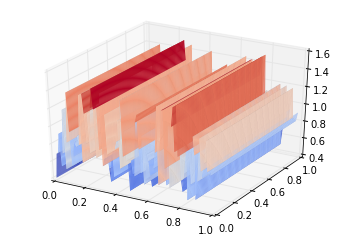

.


In [109]:
print(plot_(estimated_y_N8(w,c,x1,x2)))

In [110]:
print 'the training error is '+str(mean_squared_error(y_train,estimated_y_N8(w,c,x1_train,x2_train)))
print 'the test error is '+str(mean_squared_error(y_test,estimated_y_N8(w,c,x1_test,x2_test)))

the training error is 0.0844918179836
the test error is 0.11366472051


\vspace{5mm}
Now we'll plot the errors for every µ :

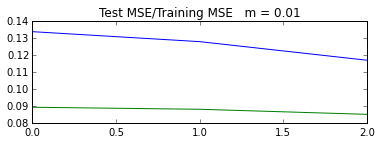

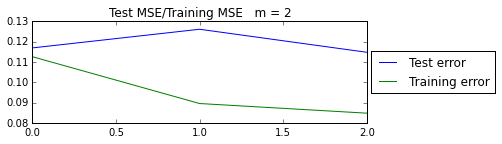

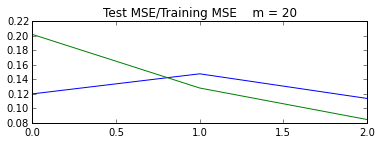

In [112]:
train_err_m01 = [0.0892,0.088,0.085]
test_err_m01 = [0.1339,0.1280,0.117]
train_err_m2 = [0.1126,0.0895,0.08474]
test_err_m2 = [0.1169,0.1261,0.11474]
train_err_m20 = [0.2020,0.1280,0.08451584]
test_err_m20 = [0.1199,0.1476,0.1136]

fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(test_err_m01)
ax.plot(train_err_m01)
ax.set_title('Test MSE/Training MSE   m = 0.01')
ax.legend(loc='center right', bbox_to_anchor=(1.9, 0.5))

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(test_err_m2,label = 'Test error')
ax1.plot(train_err_m2,label = 'Training error')
ax1.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
ax1.set_title('Test MSE/Training MSE   m = 2')

fig = plt.figure()
ax2 = fig.add_subplot(212)
ax2.plot(test_err_m20)
ax2.plot(train_err_m20)
ax2.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
ax2.set_title('Test MSE/Training MSE    m = 20')

\vspace{5mm}

In this case we can see that with N = 2 the test error increase and after decrase when N = 4 i think this behaviour can be take as result from a chance but is really clear if we see the left part of all the figure the role of µ.

\vspace{5mm}

I think now we can compare the performance of three type of learning algorithm from two point of view:

1) the test MSE with N = 4 because in unsupervised method we choose the number of the centers with the K-Means K = 4
2) the performance in computational time of all the optimization algorithm ( not for the global optimizatin algorithm BH because it's obviously more slow than the other).

\vspace{5mm}

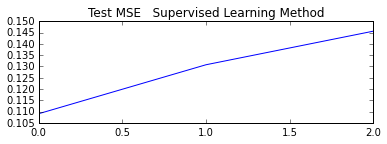

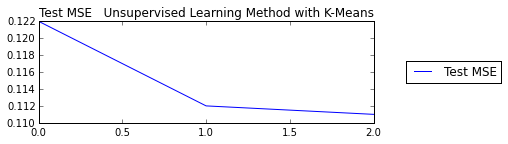

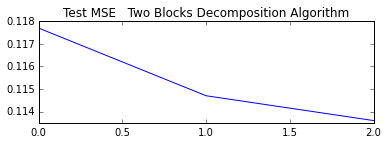

In [141]:
test_err_N4sup = [0.10901801,0.13074456,0.14564664]

test_mse_uns = [0.122, 0.112,0.111]

test_err_dec = [0.1177,0.1147,0.1136]

fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(test_err_N4sup)
ax.set_title('Test MSE   Supervised Learning Method')
ax.legend(loc='center right', bbox_to_anchor=(1.9, 0.5))

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(test_mse_uns,label = 'Test MSE')
ax1.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
ax1.set_title('Test MSE   Unsupervised Learning Method with K-Means')

fig = plt.figure()
ax2 = fig.add_subplot(212)
ax2.plot(test_err_dec)
ax2.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
ax2.set_title('Test MSE   Two Blocks Decomposition Algorithm')


\vspace{5mm}

For N = 4 it's clear that supervised learning method is the worse it seems that in case even if µ make the slope a little bit more flat doesn't avoid the increase of the error. 

\vspace{5mm}

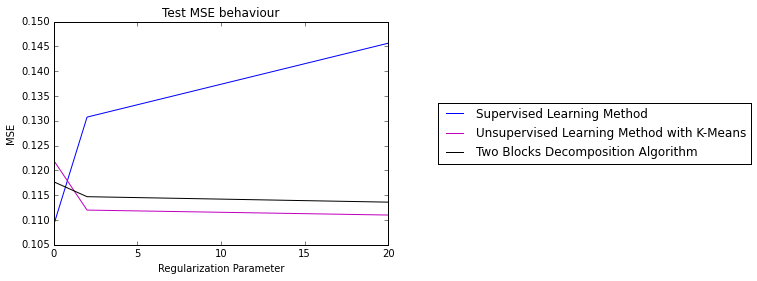

In [142]:
fig.clf()
reg_par = [0.01, 2.0, 20]
plt.plot(reg_par,test_err_N4sup,label='Supervised Learning Method')
plt.plot(reg_par,test_mse_uns,color='m', label='Unsupervised Learning Method with K-Means')
plt.plot(reg_par,test_err_dec,color='k', label='Two Blocks Decomposition Algorithm')
plt.xlabel('Regularization Parameter')
plt.ylabel('MSE')
plt.title('Test MSE behaviour')
plt.legend(loc='center right', bbox_to_anchor=(2.1, 0.5))
plt.show()
plt.close()

\vspace{5mm}

This figure put in evidence that the performance in terms of test error of the unsupervised method and the two blocks decomposition algorithm is more or less the same.
\vspace{5mm}

Now we compare the performance of the three algorithm in terms of efficiency to find a good solution in a short time.
I will not compare directly the unsupervised method with the other methods because it's a different approach at the problem but we can say that unsupervised learning more precisely clustering problems can be solved with a good efficiency also for very huge problem for example using a parallel programming languages and then the remaining optimization problem it's really simple to solve because it's convex. Thus we compare the computational time of the :

1) quasi-Newton method (BFGS)
2) conjugate gradient algorithm (CG-PPR)
3) two blocks decomposition algorithm (DA)

\vspace{5mm}

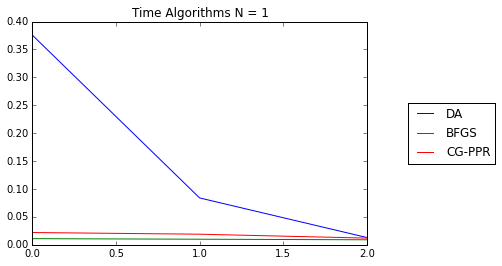

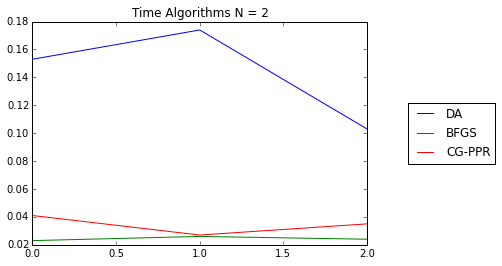

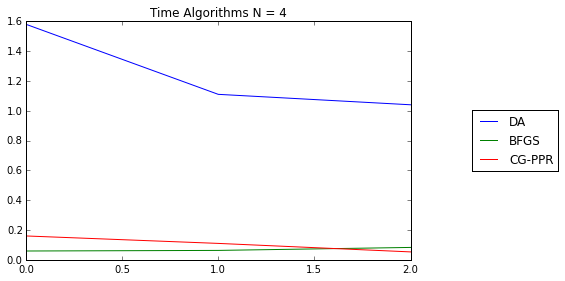

In [180]:
dectimeN1 = [0.376,0.084,0.013]
dectimeN2 = [0.153,0.174,0.103]
dectimeN4= [1.58,1.11,1.04]

bfgsN1 = [0.011,0.010,0.009]
cgN1 = [0.022,0.019,0.012]
bhN1 = [2,1.8,1.49]

bfgsN2 = [0.023,0.026,0.024]
cgN2 = [0.041,0.027,0.035]
bhN2 = [11.51,6.76,5.44]

bfgsN4= [0.059,0.063,0.083]
cgN4= [0.16,0.11,0.053]
bhN4= [92.19,25.36,24.98]

fig = plt.figure()
ax.set_xlabel('common xlabel')
ax.set_ylabel('common ylabel')

ax = fig.add_subplot(111)
ax.plot(dectimeN1,label='DA')
ax.plot(bfgsN1,label='BFGS')
ax.plot(cgN1,label='CG-PPR')
ax.set_title('Time Algorithms N = 1')
ax.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dectimeN2,label='DA')
ax1.plot(bfgsN2,label='BFGS')
ax1.plot(cgN2,label = 'CG-PPR')
ax1.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
ax1.set_title('Time Algorithms N = 2')

fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.plot(dectimeN4,label='DA')
ax2.plot(bfgsN4,label='BFGS')
ax2.plot(cgN4,label='CG-PPR')
ax2.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
ax2.set_title('Time Algorithms N = 4')
fig.tight_layout()


\vspace{5mm}

The DA it's in average slower than the other two algorithms, because there are many evaluations inside in a main loop, for that the computational cost of this approach is highest than apply an algorithm directly, but also we have seen that for example for N = 4 that the DA generalize the problem much better than the supervised method. 